In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
from datetime import timedelta, datetime

The dataset contains Global Mean Sea Level (GMSL) variations compared to the 20 year collinear mean reference from year 1996 - 2016

In [5]:
header_names = ['Type', 'Index', 'Year', 'nOfObs', 'nOfWObs', 'GMSL1', 'stdGMSL1', 'smGMSL1',
                'GMSL2', 'stdGMSL2', 'smGMSL2', 'smGMSL3']
raw_data = pd.read_csv('HDR Global Mean Sea Level Data.txt', sep = "\n", skiprows = 49)
raw_data.head()

,HDR Header_End---------------------------------------
0,0 11 1993.0115260 466462 337277.00 ...
1,0 12 1993.0386920 460889 334037.31 ...
2,0 13 1993.0658580 472123 342416.09 ...
3,0 14 1993.0930250 421377 306050.59 ...
4,0 15 1993.1201910 459548 331094.09 ...


In [6]:
raw_data.columns = ['Lines']
df = raw_data['Lines'].str.split(n = 12, expand=True)
df.columns = header_names
df = df.astype(float)
df = df.astype({'nOfObs': int})
df.head()

,Type,Index,Year,nOfObs,nOfWObs,GMSL1,stdGMSL1,smGMSL1,GMSL2,stdGMSL2,smGMSL2,smGMSL3
0,0.0,11.0,1993.011526,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55
1,0.0,12.0,1993.038692,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06
2,0.0,13.0,1993.065858,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60
3,0.0,14.0,1993.093025,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45
4,0.0,15.0,1993.120191,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44


In [7]:
def is_leap(year):
    return year % 4 == 0 and year % 100 != 0 and year % 400 == 0
def convert_partial_year(number):
    year = int(number)
    d = timedelta(days=(number - year)*(365 + is_leap(year)))
    day_one = datetime(year,1,1)
    date = d + day_one
    return date

In [8]:
df['Year'] = df['Year'].apply(convert_partial_year)
df.head()

,Type,Index,Year,nOfObs,nOfWObs,GMSL1,stdGMSL1,smGMSL1,GMSL2,stdGMSL2,smGMSL2,smGMSL3
0,0.0,11.0,1993-01-05 04:58:03.936000,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55
1,0.0,12.0,1993-01-15 02:56:30.912003,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06
2,0.0,13.0,1993-01-25 00:54:57.887998,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60
3,0.0,14.0,1993-02-03 22:53:56.399997,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45
4,0.0,15.0,1993-02-13 20:52:23.375999,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44


Let's plot a time series of GMSL2 and smGMSL3. GMSL2 is GMSL with Global Isostatic Adjustment (GIA) applied. smGMSL3 is smoothed GMSL2 with annual and semi-annual signals removed

In [9]:
df1 = df[['Year','GMSL2','smGMSL3']]
df1 = df1.set_index('Year')
df1.head()

,GMSL2,smGMSL3
Year,,
1993-01-05 04:58:03.936000,-37.24,-37.55
1993-01-15 02:56:30.912003,-40.34,-38.06
1993-01-25 00:54:57.887998,-40.16,-37.60
1993-02-03 22:53:56.399997,-41.89,-37.45
1993-02-13 20:52:23.375999,-36.85,-36.44


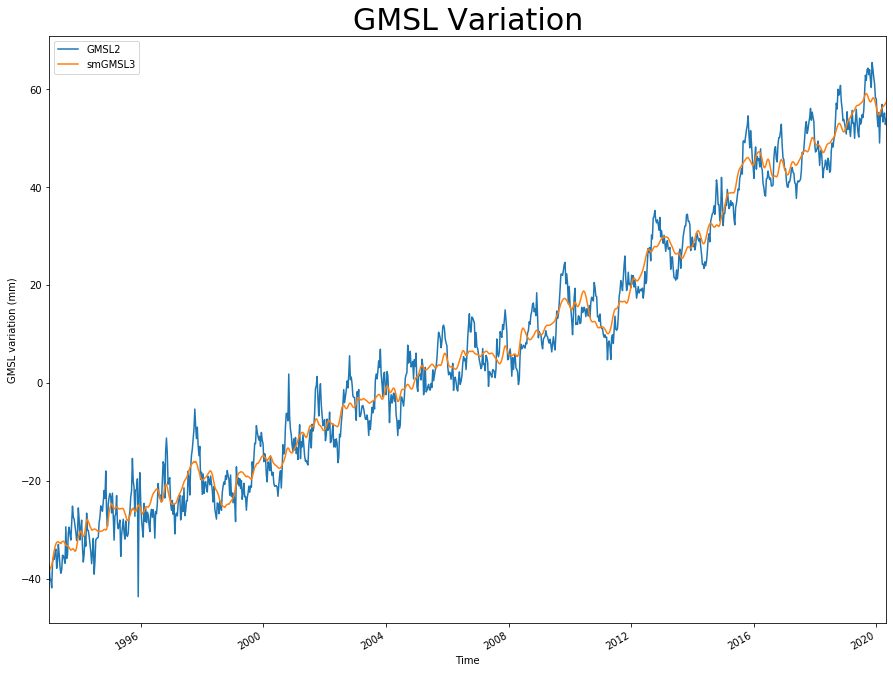

In [10]:
df1.plot(figsize = (15,12), linewidth = 1.5)
plt.xlabel('Time')
plt.ylabel('GMSL variation (mm)')
plt.title('GMSL Variation', fontsize = 30)
plt.show()

In [11]:
# Standard plotly imports
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [12]:
df1.iplot(kind='line', xTitle='Time (years)',
                  yTitle='GMSL (mm)', title='Global Mean Sea Level (mm)', size = (100, 100), width = 1.5)